Softmax Function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

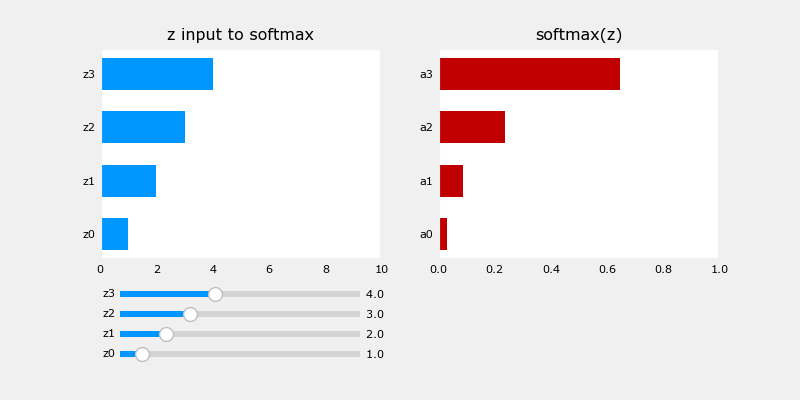

In [4]:
plt.close("all")
plt_softmax(my_softmax)

Tensorflow

In [5]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [6]:
model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 1.4476 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.6716
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.3182
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.1520
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.0801
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0664
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.0551
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.0380
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.0382
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.0354


In [7]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
[[1.29e-03 2.61e-03 9.87e-01 8.99e-03]
 [9.96e-01 3.19e-03 8.05e-04 3.94e-04]]
largest value 0.99999964 smallest value 2.9071142e-08


In [10]:
preferred_model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 1.5136 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.6427
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.3205
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.1773
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.1032
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.0721
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.0624
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.0540
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.0502
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.0433


In [11]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
two example output vectors:
 [[-2.61 -3.37  3.14 -0.38]
 [ 5.   -0.35 -3.13 -5.31]]
largest value 13.051089 smallest value -11.267699


In [12]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[3.07e-03 1.44e-03 9.67e-01 2.87e-02]
 [9.95e-01 4.71e-03 2.94e-04 3.30e-05]]
largest value 0.99999726 smallest value 2.3998068e-09


In [13]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.61 -3.37  3.14 -0.38], category: 2
[ 5.   -0.35 -3.13 -5.31], category: 0
[ 3.68  0.25 -2.41 -4.19], category: 0
[-0.68  3.78 -0.84 -1.36], category: 1
[-1.78 -5.97  3.52 -5.8 ], category: 2
